In [1]:
!pip install datetime meteomatics matplotlib cartopy pandas requests numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.2/52.2 kB 709.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.1/247.1 kB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 5.1 MB/s eta 0:00:00


# ***Ploting Images directly from saved Images***

In [4]:
#Import dependencies

import requests
import matplotlib.pyplot as plt
import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import datetime as dt
import meteomatics.api as api

Enter date (YYYY-MM-DD): 2023-12-07


/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


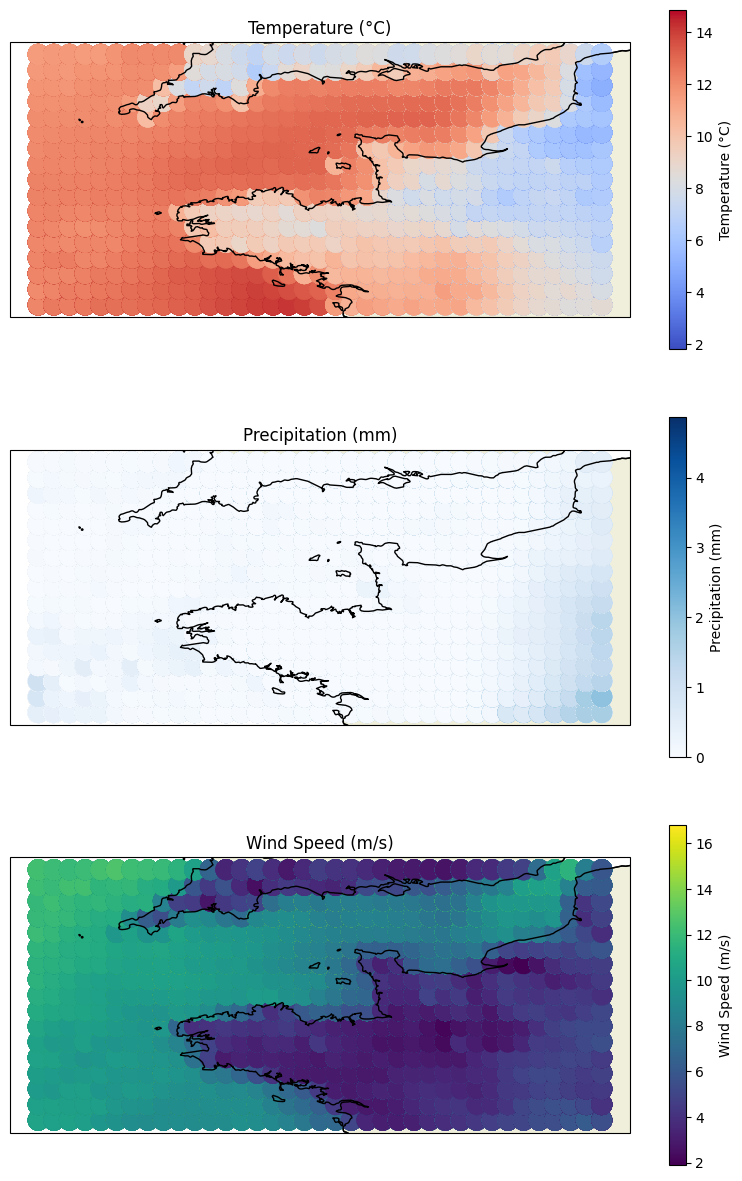

In [5]:

# Your Meteomatics credentials: valid till 2023-12-07
username = 'columbiauniversity_patel_apurva'
password = '2Tr0BCHmu6'

#New Credentials: valid till 2023-12-21
#username = 'isro_university_columbia'
#password = 'CSx172fQer'

# Create a more granular grid for northwest France with 0.1-degree increment
latitude_range = np.arange(47, 51.1, 0.25)
longitude_range = np.arange(-7, 2.1, 0.25)

# Parameters to retrieve
parameters = ['t_2m:C', 'precip_1h:mm', 'wind_speed_10m:ms']

# Model to use
model = 'mix'

# Get start date from user
start_date_str = input("Enter date (YYYY-MM-DD): ")
start_date = dt.datetime.strptime(start_date_str, "%Y-%m-%d")

# Set the time range
end_date = start_date + dt.timedelta(days=1)
interval = dt.timedelta(hours=1)

# Query Meteomatics API for time series data
df = api.query_time_series([(latitude, longitude) for latitude in latitude_range for longitude in longitude_range],
                           start_date, end_date, interval, parameters, username, password, model=model)

# Extracting data from the DataFrame
timestamps = df.index
temperature_data = df['t_2m:C'].rolling(window=3, min_periods=1).mean().values
precipitation_data = df['precip_1h:mm'].rolling(window=3, min_periods=1).mean().values
wind_speed_data = df['wind_speed_10m:ms'].rolling(window=3, min_periods=1).mean().values

# Extracting latitude and longitude from the index
latitudes = [index[0] for index in df.index]
longitudes = [index[1] for index in df.index]

# Plotting using Cartopy
fig, axs = plt.subplots(3, 1, figsize=(10, 15), subplot_kw={'projection': ccrs.PlateCarree()})

# Common map features
for ax in axs:
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.LAKES, edgecolor='black')

# Plot temperature
sc1 = axs[0].scatter(longitudes, latitudes, c=temperature_data, cmap='coolwarm', s=200, transform=ccrs.PlateCarree())
axs[0].set_title('Temperature (°C)')

# Plot precipitation
sc2 = axs[1].scatter(longitudes, latitudes, c=precipitation_data, cmap='Blues', s=200, transform=ccrs.PlateCarree())
axs[1].set_title('Precipitation (mm)')

# Plot wind speed
sc3 = axs[2].scatter(longitudes, latitudes, c=wind_speed_data, cmap='viridis', s=200, transform=ccrs.PlateCarree())
axs[2].set_title('Wind Speed (m/s)')

# Add colorbars
plt.colorbar(sc1, ax=axs[0], label='Temperature (°C)')
plt.colorbar(sc2, ax=axs[1], label='Precipitation (mm)')
plt.colorbar(sc3, ax=axs[2], label='Wind Speed (m/s)')

plt.show()


In [6]:
start_date

datetime.datetime(2023, 12, 7, 0, 0)

In [7]:
end_date

datetime.datetime(2023, 12, 8, 0, 0)

In [8]:
df

t_2m:C  precip_1h:mm  wind_speed_10m:ms
lat  lon  validdate                                                         
47.0 -7.0 2023-12-07 00:00:00+00:00    14.2          0.19               12.8
          2023-12-07 01:00:00+00:00    14.1          0.35               13.1
          2023-12-07 02:00:00+00:00    14.0          0.29               13.5
          2023-12-07 03:00:00+00:00    14.0          0.22               13.6
          2023-12-07 04:00:00+00:00    14.0          0.19               13.5
...                                     ...           ...                ...
51.0  2.0 2023-12-07 20:00:00+00:00     6.2          0.54                7.6
          2023-12-07 21:00:00+00:00     6.2          1.23                7.1
          2023-12-07 22:00:00+00:00     6.3          0.93                6.6
          2023-12-07 23:00:00+00:00     6.5          0.42                5.8
          2023-12-08 00:00:00+00:00     6.8          0.11                5.2

[15725 rows x 3 columns]

# ***Saving Images from selected Date***

In [9]:

# Your Meteomatics credentials
username = 'columbiauniversity_patel_apurva'
password = '2Tr0BCHmu6'

# Create a more granular grid for northwest France with 0.1-degree increment
latitude_range = np.arange(47, 51.1, 0.25)
longitude_range = np.arange(-7, 2.1, 0.25)

# Parameters to retrieve
parameters = ['t_2m:C', 'precip_1h:mm', 'wind_speed_10m:ms']

# Model to use
model = 'mix'

# Get start date from user
start_date_str = input("Enter date (YYYY-MM-DD): ")
start_date = dt.datetime.strptime(start_date_str, "%Y-%m-%d")

# Set the time range
end_date = start_date + dt.timedelta(days=1)
interval = dt.timedelta(hours=1)

# Query Meteomatics API for time series data
df = api.query_time_series([(latitude, longitude) for latitude in latitude_range for longitude in longitude_range],
                           start_date, end_date, interval, parameters, username, password, model=model)

# Extracting data from the DataFrame
timestamps = df.index
temperature_data = df['t_2m:C'].rolling(window=3, min_periods=1).mean().values
precipitation_data = df['precip_1h:mm'].rolling(window=3, min_periods=1).mean().values
wind_speed_data = df['wind_speed_10m:ms'].rolling(window=3, min_periods=1).mean().values

# Extracting latitude and longitude from the index
latitudes = [index[0] for index in df.index]
longitudes = [index[1] for index in df.index]

# Plotting with Cartopy projections and common map features
os.makedirs("predictions", exist_ok=True)

# Plot temperature
fig, ax = plt.subplots(figsize=(10, 7), subplot_kw={'projection': ccrs.PlateCarree()})
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.LAKES, edgecolor='black')
sc1 = ax.scatter(longitudes, latitudes, c=temperature_data, cmap='coolwarm', s=200, transform=ccrs.PlateCarree())
ax.set_title('Temperature (°C)')
plt.colorbar(sc1, ax=ax, label='Temperature (°C)')
plt.savefig(os.path.join("predictions", "temperature_plot.png"))
plt.clf()

# Plot precipitation
fig, ax = plt.subplots(figsize=(10, 7), subplot_kw={'projection': ccrs.PlateCarree()})
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.LAKES, edgecolor='black')
sc2 = ax.scatter(longitudes, latitudes, c=precipitation_data, cmap='Blues', s=200, transform=ccrs.PlateCarree())
ax.set_title('Precipitation (mm)')
plt.colorbar(sc2, ax=ax, label='Precipitation (mm)')
plt.savefig(os.path.join("predictions", "precipitation_plot.png"))
plt.clf()

# Plot wind speed
fig, ax = plt.subplots(figsize=(10, 7), subplot_kw={'projection': ccrs.PlateCarree()})
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.LAKES, edgecolor='black')
sc3 = ax.scatter(longitudes, latitudes, c=wind_speed_data, cmap='viridis', s=200, transform=ccrs.PlateCarree())
ax.set_title('Wind Speed (m/s)')
plt.colorbar(sc3, ax=ax, label='Wind Speed (m/s)')
plt.savefig(os.path.join("predictions", "wind_speed_plot.png"))
plt.clf()


Enter date (YYYY-MM-DD): 2023-12-07


<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

# ***Displaying saved images***

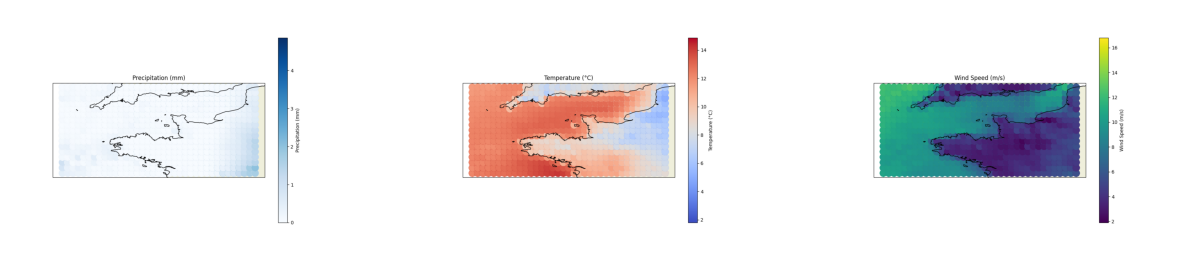

In [10]:
import os
import matplotlib.pyplot as plt

# Folder containing the saved images
folder_path = "predictions"

# List to store loaded images
loaded_images = []

# Load each image from the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".png"):
        image_path = os.path.join(folder_path, filename)
        loaded_images.append(plt.imread(image_path))

# Display the loaded images in a window
fig, axs = plt.subplots(1, len(loaded_images), figsize=(15, 5))

for i, image in enumerate(loaded_images):
    axs[i].imshow(image)
    axs[i].axis("off")
    # axs[i].set_title(f"Image {i + 1}")

plt.show()

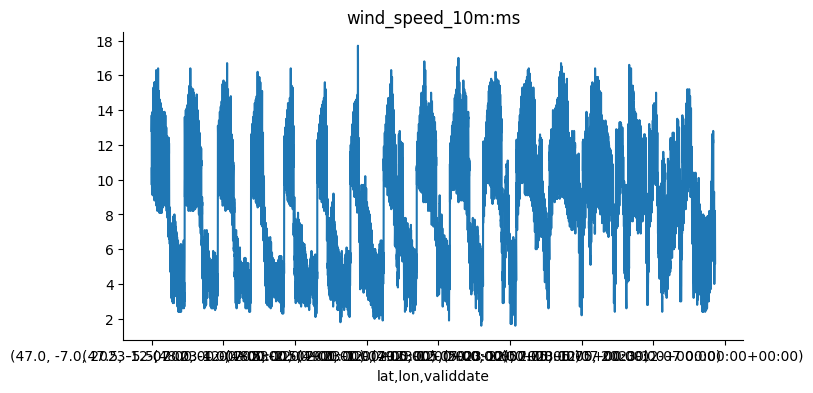

In [11]:
from matplotlib import pyplot as plt
df['wind_speed_10m:ms'].plot(kind='line', figsize=(8, 4), title='wind_speed_10m:ms')
plt.gca().spines[['top', 'right']].set_visible(False)

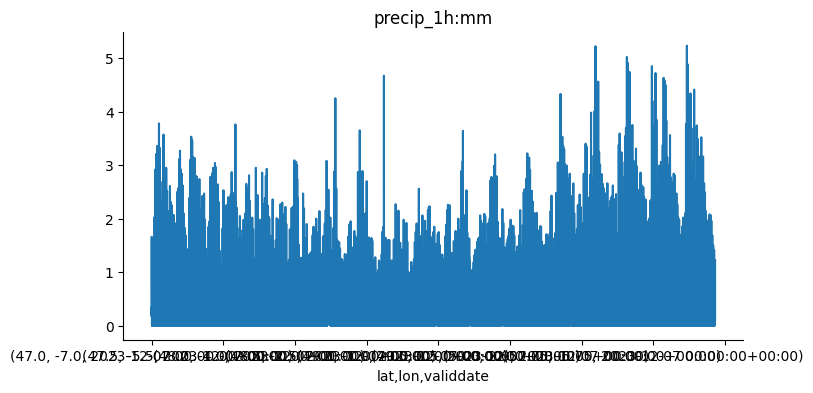

In [12]:
from matplotlib import pyplot as plt
df['precip_1h:mm'].plot(kind='line', figsize=(8, 4), title='precip_1h:mm')
plt.gca().spines[['top', 'right']].set_visible(False)

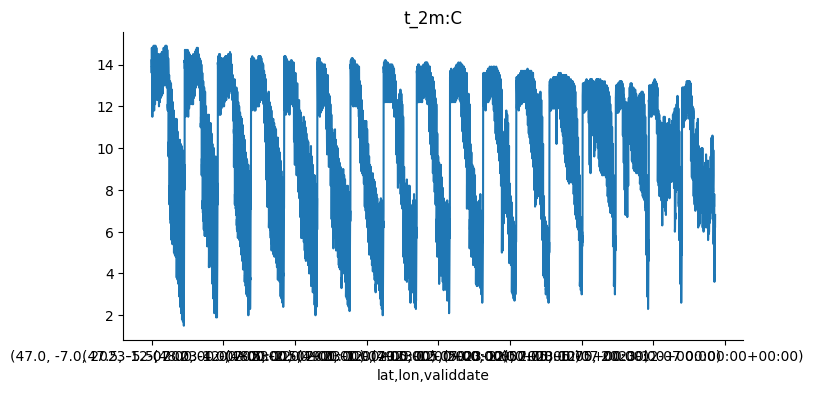

In [13]:
from matplotlib import pyplot as plt
df['t_2m:C'].plot(kind='line', figsize=(8, 4), title='t_2m:C')
plt.gca().spines[['top', 'right']].set_visible(False)

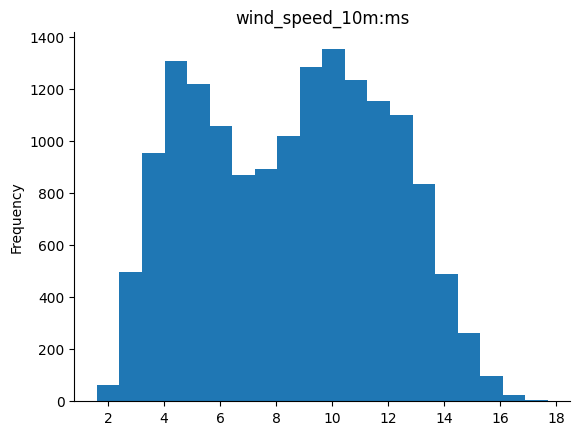

In [14]:
from matplotlib import pyplot as plt
df['wind_speed_10m:ms'].plot(kind='hist', bins=20, title='wind_speed_10m:ms')
plt.gca().spines[['top', 'right',]].set_visible(False)

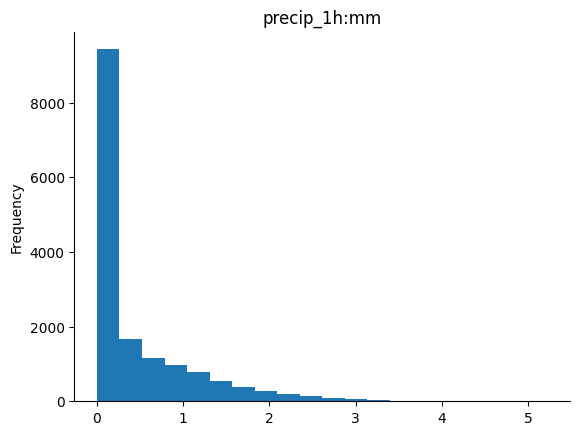

In [15]:
from matplotlib import pyplot as plt
df['precip_1h:mm'].plot(kind='hist', bins=20, title='precip_1h:mm')
plt.gca().spines[['top', 'right',]].set_visible(False)

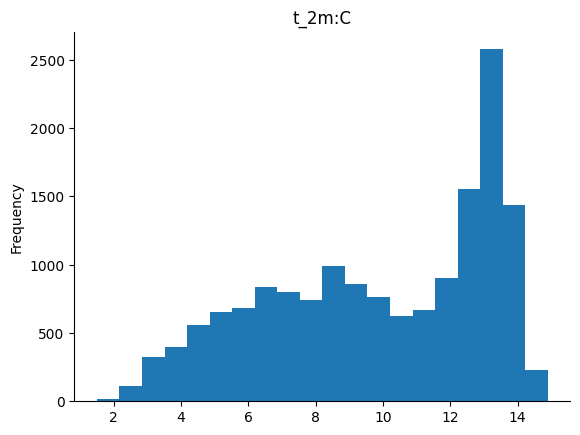

In [16]:
from matplotlib import pyplot as plt
df['t_2m:C'].plot(kind='hist', bins=20, title='t_2m:C')
plt.gca().spines[['top', 'right',]].set_visible(False)

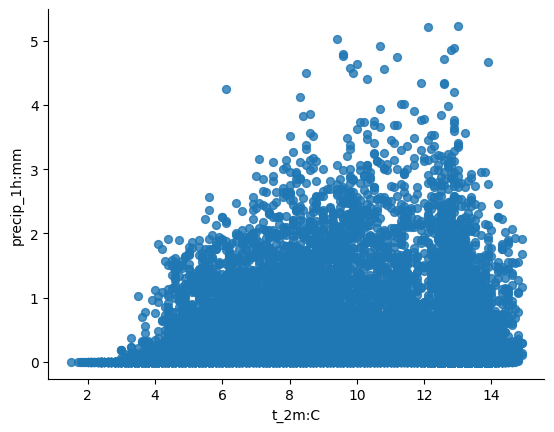

In [17]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='t_2m:C', y='precip_1h:mm', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

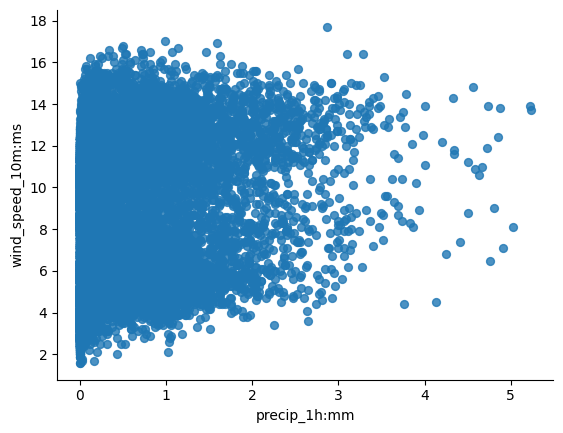

In [18]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='precip_1h:mm', y='wind_speed_10m:ms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)